In [35]:
# https://youtu.be/hOLSGMEEwlI

In [36]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [37]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [38]:
# Store the data into a dataframe
filename = next(iter(uploaded))
df = pd.read_csv(filename)
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-28,1275.449951,1299.310059,1272.540039,1290.000000,1290.000000,2613200
1,2019-10-29,1276.229980,1281.589966,1257.212036,1262.619995,1262.619995,1886400
2,2019-10-30,1252.969971,1269.359985,1252.000000,1261.290039,1261.290039,1408900
3,2019-10-31,1261.280029,1267.670044,1250.843018,1260.109985,1260.109985,1455700
4,2019-11-01,1265.000000,1274.619995,1260.500000,1273.739990,1273.739990,1670100
5,2019-11-04,1276.449951,1294.130005,1276.354980,1291.369995,1291.369995,1501000


In [39]:
# Get the number of trading days
df.shape

(251, 7)

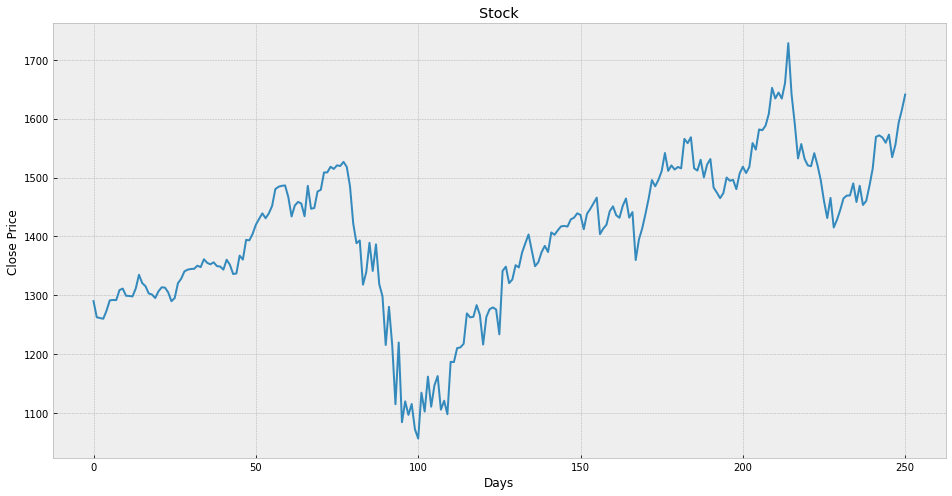

In [40]:
# Visualize the close price data
plt.figure(figsize=(16, 8))
plt.title('Stock')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [41]:
# Get the close price
df = df[['Adj Close']]
df.head(4)

,Adj Close
0,1290.000000
1,1262.619995
2,1261.290039
3,1260.109985


In [42]:
# Create a variable to predict 'x' day out into the future
future_days = 25
# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Adj Close']].shift(-future_days)
df.head(4)
df.tail(30)

,Adj Close,Prediction
221,1519.280029,1534.609985
222,1541.439941,1555.930054
223,1520.900024,1593.310059
224,1495.530029,1615.329956
225,1459.989990,1641.000000
226,1431.160034,NaN
227,1465.459961,NaN
228,1415.209961,NaN
229,1428.290039,NaN
230,1444.959961,NaN


In [43]:
# Create a feature data set (X) and convert it to a numpy array and remove the last x rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[1290.      ]
 [1262.619995]
 [1261.290039]
 [1260.109985]
 [1273.73999 ]
 [1291.369995]
 [1292.030029]
 [1291.800049]
 [1308.859985]
 [1311.369995]
 [1299.189941]
 [1298.800049]
 [1298.      ]
 [1311.459961]
 [1334.869995]
 [1320.699951]
 [1315.459961]
 [1303.050049]
 [1301.349976]
 [1295.339966]
 [1306.689941]
 [1313.550049]
 [1312.98999 ]
 [1304.959961]
 [1289.920044]
 [1295.280029]
 [1320.540039]
 [1328.130005]
 [1340.619995]
 [1343.560059]
 [1344.660034]
 [1345.02002 ]
 [1350.27002 ]
 [1347.829956]
 [1361.170044]
 [1355.119995]
 [1352.619995]
 [1356.040039]
 [1349.589966]
 [1348.839966]
 [1343.560059]
 [1360.400024]
 [1351.890015]
 [1336.140015]
 [1337.02002 ]
 [1367.369995]
 [1360.660034]
 [1394.209961]
 [1393.339966]
 [1404.319946]
 [1419.829956]
 [1429.72998 ]
 [1439.22998 ]
 [1430.880005]
 [1439.199951]
 [1451.699951]
 [1480.390015]
 [1484.400024]
 [1485.949951]
 [1486.650024]
 [1466.709961]
 [1433.900024]
 [1452.560059]
 [1458.630005]
 [1455.839966]
 [1434.22998 ]
 [1485.939

In [44]:
# Create the target data set (y) and convert it to a numpy array adn get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[1295.280029 1320.540039 1328.130005 1340.619995 1343.560059 1344.660034
 1345.02002  1350.27002  1347.829956 1361.170044 1355.119995 1352.619995
 1356.040039 1349.589966 1348.839966 1343.560059 1360.400024 1351.890015
 1336.140015 1337.02002  1367.369995 1360.660034 1394.209961 1393.339966
 1404.319946 1419.829956 1429.72998  1439.22998  1430.880005 1439.199951
 1451.699951 1480.390015 1484.400024 1485.949951 1486.650024 1466.709961
 1433.900024 1452.560059 1458.630005 1455.839966 1434.22998  1485.939941
 1447.069946 1448.22998  1476.22998  1479.22998  1508.680054 1508.790039
 1518.27002  1514.660034 1520.73999  1519.670044 1526.689941 1518.150024
 1485.109985 1421.589966 1388.449951 1393.180054 1318.089966 1339.329956
 1389.109985 1341.390015 1386.52002  1319.040039 1298.410034 1215.560059
 1280.390015 1215.410034 1114.910034 1219.72998  1084.329956 1119.800049
 1096.800049 1115.290039 1072.319946 1056.619995 1134.459961 1102.48999
 1161.75     1110.709961 1146.819946 1162.810059 110

In [45]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [46]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


In [47]:
# Get the last 'x' rows from of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[1507.72998 ],
       [1517.97998 ],
       [1558.599976],
       [1547.530029],
       [1581.75    ],
       [1580.420044],
       [1588.199951],
       [1608.219971],
       [1652.380005],
       [1634.329956],
       [1644.410034],
       [1634.180054],
       [1660.709961],
       [1728.280029],
       [1641.839966],
       [1591.040039],
       [1532.390015],
       [1556.959961],
       [1532.02002 ],
       [1520.719971],
       [1519.280029],
       [1541.439941],
       [1520.900024],
       [1495.530029],
       [1459.98999 ]])

In [48]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1431.160034 1465.459961 1415.209961 1428.290039 1444.959961 1464.52002
 1469.329956 1469.599976 1490.089966 1453.439941 1486.02002  1453.439941
 1490.089966 1490.089966 1515.219971 1569.150024 1571.680054 1568.079956
 1559.130005 1573.01001  1134.459961 1555.930054 1593.310059 1496.099976
 1319.040039]

[1454.64618878 1458.36742047 1473.11438795 1469.09547696 1481.51893459
 1481.03609806 1483.86056992 1491.12877802 1507.16094565 1500.6079296
 1504.26747163 1500.55350813 1510.18511114 1534.71622127 1503.33441617
 1484.89165533 1463.59894038 1472.51898543 1463.4646148  1459.36216597
 1458.83939936 1466.88448881 1459.42753367 1450.21703323 1437.31432888]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


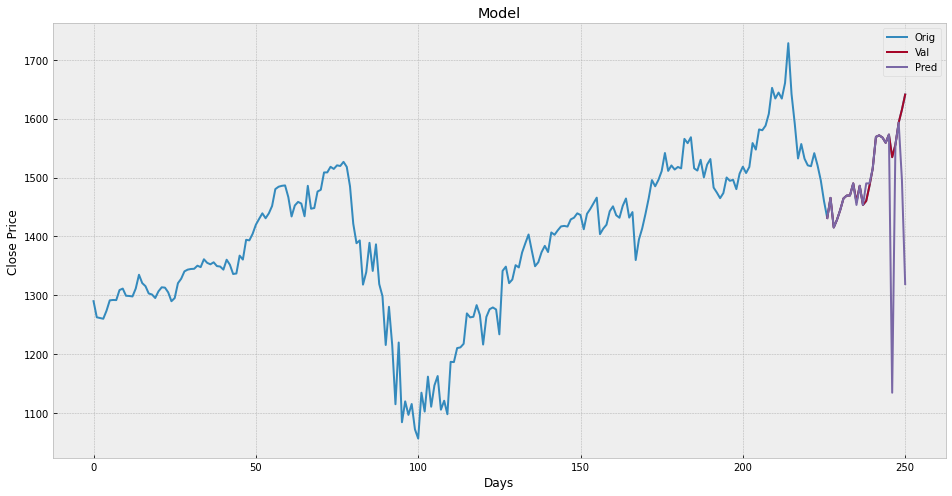

In [49]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


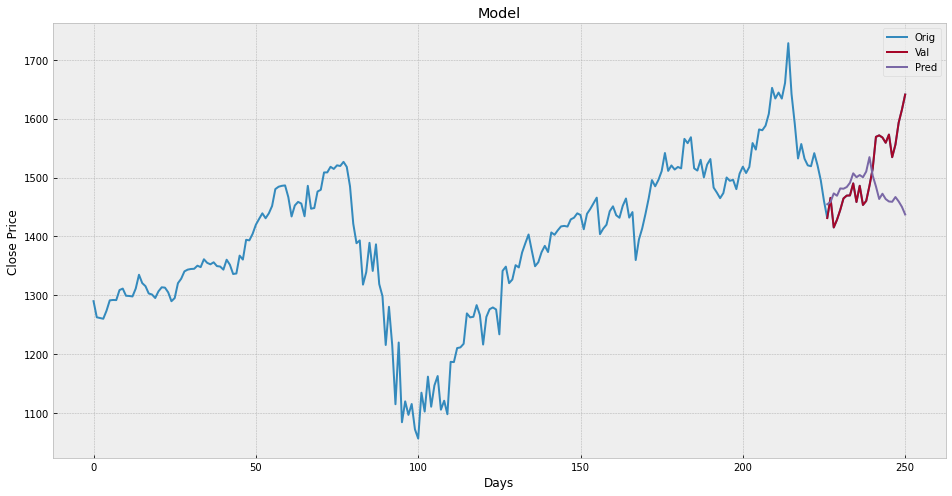

In [50]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()